In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('drive/My Drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import datetime

In [3]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [4]:
client_train = pd.read_csv('/content/drive/MyDrive/ML Academy/project 1/train/client_train.csv')
client_test = pd.read_csv('/content/drive/MyDrive/ML Academy/project 1/test/client_test.csv')
invoice_test = pd.read_csv('/content/drive/MyDrive/ML Academy/project 1/test/invoice_test.csv')
invoice_train = pd.read_csv('/content/drive/MyDrive/ML Academy/project 1/train/invoice_train.csv')

<ipython-input-4-1bad49d12bf3>:4: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  invoice_train = pd.read_csv('/content/drive/MyDrive/ML Academy/project 1/train/invoice_train.csv')


In [6]:
print('client train shape is : ', client_train.shape)
print('invoice train shape is : ', invoice_train.shape)
print('client test shape is : ', client_test.shape)
print('invoice test shape is : ', invoice_test.shape)

client train shape is :  (135493, 6)
invoice train shape is :  (4476749, 16)
client test shape is :  (58069, 5)
invoice test shape is :  (1939730, 16)


In [25]:
test = invoice_test.merge(client_test , on ='client_id' )
test

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type,disrict,client_catg,region,creation_date
0,test_Client_0,2018-03-16,11,651208,0,203,8,1,755,0,0,0,19145,19900,8,ELEC,62,11,307,28/05/2002
1,test_Client_0,2014-03-21,11,651208,0,203,8,1,1067,0,0,0,13725,14792,8,ELEC,62,11,307,28/05/2002
2,test_Client_0,2014-07-17,11,651208,0,203,8,1,0,0,0,0,14792,14792,4,ELEC,62,11,307,28/05/2002
3,test_Client_0,2015-07-13,11,651208,0,203,9,1,410,0,0,0,16122,16532,4,ELEC,62,11,307,28/05/2002
4,test_Client_0,2016-07-19,11,651208,0,203,9,1,412,0,0,0,17471,17883,4,ELEC,62,11,307,28/05/2002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1939725,test_Client_9999,2010-03-11,11,869269,0,203,6,1,248,0,0,0,21114,21362,4,ELEC,69,11,104,14/03/1990
1939726,test_Client_9999,2011-03-15,11,869269,0,203,6,1,260,0,0,0,21362,21622,4,ELEC,69,11,104,14/03/1990
1939727,test_Client_9999,2012-12-03,11,869269,0,203,6,1,312,0,0,0,22272,22584,4,ELEC,69,11,104,14/03/1990
1939728,test_Client_9999,2009-07-01,11,869269,0,203,6,1,236,0,0,0,19909,20145,4,ELEC,69,11,104,14/03/1990


In [26]:
train = invoice_train.merge(client_train , on ='client_id')
train

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,...,consommation_level_4,old_index,new_index,months_number,counter_type,disrict,client_catg,region,creation_date,target
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,...,0,14302,14384,4,ELEC,60,11,101,31/12/1994,0.0
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,...,0,12294,13678,4,ELEC,60,11,101,31/12/1994,0.0
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,...,0,14624,14747,4,ELEC,60,11,101,31/12/1994,0.0
3,train_Client_0,2015-07-13,11,1335667,0,207,8,1,102,0,...,0,14747,14849,4,ELEC,60,11,101,31/12/1994,0.0
4,train_Client_0,2016-11-17,11,1335667,0,207,9,1,572,0,...,0,15066,15638,12,ELEC,60,11,101,31/12/1994,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4476744,train_Client_99998,2005-08-19,10,1253571,0,202,9,1,400,135,...,0,3197,3732,8,ELEC,60,11,101,22/12/1993,0.0
4476745,train_Client_99998,2005-12-19,10,1253571,0,202,6,1,200,6,...,0,3732,3938,4,ELEC,60,11,101,22/12/1993,0.0
4476746,train_Client_99999,1996-09-25,11,560948,0,203,6,1,259,0,...,0,13884,14143,4,ELEC,60,11,101,18/02/1986,0.0
4476747,train_Client_99999,1996-05-28,11,560948,0,203,6,1,603,0,...,0,13281,13884,4,ELEC,60,11,101,18/02/1986,0.0


In [27]:
train = train.drop('client_id' , axis = 1)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4476749 entries, 0 to 4476748
Data columns (total 20 columns):
 #   Column                Dtype  
---  ------                -----  
 0   invoice_date          object 
 1   tarif_type            int64  
 2   counter_number        int64  
 3   counter_statue        object 
 4   counter_code          int64  
 5   reading_remarque      int64  
 6   counter_coefficient   int64  
 7   consommation_level_1  int64  
 8   consommation_level_2  int64  
 9   consommation_level_3  int64  
 10  consommation_level_4  int64  
 11  old_index             int64  
 12  new_index             int64  
 13  months_number         int64  
 14  counter_type          object 
 15  disrict               int64  
 16  client_catg           int64  
 17  region                int64  
 18  creation_date         object 
 19  target                float64
dtypes: float64(1), int64(15), object(4)
memory usage: 717.3+ MB


In [8]:
train.isnull().sum()

invoice_date            0
tarif_type              0
counter_number          0
counter_statue          0
counter_code            0
reading_remarque        0
counter_coefficient     0
consommation_level_1    0
consommation_level_2    0
consommation_level_3    0
consommation_level_4    0
old_index               0
new_index               0
months_number           0
counter_type            0
disrict                 0
client_catg             0
region                  0
creation_date           0
target                  0
dtype: int64

In [10]:
train.head()

,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type,disrict,client_catg,region,creation_date,target
0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,ELEC,60,11,101,31/12/1994,0.0
1,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,ELEC,60,11,101,31/12/1994,0.0
2,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,ELEC,60,11,101,31/12/1994,0.0
3,2015-07-13,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4,ELEC,60,11,101,31/12/1994,0.0
4,2016-11-17,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12,ELEC,60,11,101,31/12/1994,0.0


In [28]:
train = train.drop_duplicates()

In [29]:
train['invoice_date'].dtype

dtype('O')

In [30]:
## convert invoice date from object to int datatype
train['invoice_date'] = pd.to_datetime(train['invoice_date'] , format= "%Y/%m/%d")
train['invoice_year'] = train['invoice_date'].dt.year
train['invoice_month'] = train['invoice_date'].dt.month
train['invoice_day'] = train['invoice_date'].dt.day
train = train.drop('invoice_date' , axis = 1)

## convert invoice date from object to int datatype
train['creation_date'] = pd.to_datetime(train['creation_date'] , format = "%d/%m/%Y")
train['creation_year'] = train['creation_date'].dt.year
train['creation_month'] = train['creation_date'].dt.month
train['creation_day'] = train['creation_date'].dt.day
train = train.drop('creation_date' , axis = 1)
train.shape

(4471461, 24)

In [14]:
train.head()

,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,...,disrict,client_catg,region,target,invoice_year,invoice_month,invoice_day,creation_year,creation_month,creation_day
0,11,1335667,0,203,8,1,82,0,0,0,...,60,11,101,0.0,2014,3,24,1994,12,31
1,11,1335667,0,203,6,1,1200,184,0,0,...,60,11,101,0.0,2013,3,29,1994,12,31
2,11,1335667,0,203,8,1,123,0,0,0,...,60,11,101,0.0,2015,3,23,1994,12,31
3,11,1335667,0,207,8,1,102,0,0,0,...,60,11,101,0.0,2015,7,13,1994,12,31
4,11,1335667,0,207,9,1,572,0,0,0,...,60,11,101,0.0,2016,11,17,1994,12,31


In [15]:

train['counter_statue'].unique()

array([0, 1, 5, 4, 3, 2, 769, '0', '5', '1', '4', 'A', 618, 269375, 46,
       420], dtype=object)

In [16]:
train['counter_statue'].value_counts()

0         4342374
1           73041
0           32048
5           20248
4            2706
1             540
3             258
5             144
2              32
4              23
46             14
A              13
618            12
769             6
269375          1
420             1
Name: counter_statue, dtype: int64

In [31]:
train.loc[train['counter_statue'] == '0', 'counter_statue'] = 0
train.loc[train['counter_statue'] == '1', 'counter_statue'] = 1
train.loc[train['counter_statue'] == '5', 'counter_statue'] = 5
train.loc[train['counter_statue'] == '4', 'counter_statue'] = 4

In [32]:
train = train[train['counter_statue'] != 420]
train = train[train['counter_statue'] != 269375]
train = train[train['counter_statue'] != 46]
train = train[train['counter_statue'] != 'A']
train = train[train['counter_statue'] != 618]
train = train[train['counter_statue'] != 769]

In [19]:
train['tarif_type'].value_counts()

11    2679823
40    1374482
10     276210
15      72409
45      17552
13      11656
14      11611
12      11345
29      10090
9        6039
21        104
8          43
30         35
24          9
18          4
42          1
27          1
Name: tarif_type, dtype: int64

In [33]:
# train = train[train['tarif_type'] != 27]
train = train[train['tarif_type'] != 18]
# train = train[train['tarif_type'] != 42]
train = train[train['tarif_type'] != 24]

In [21]:
train['counter_number'].value_counts()

0                37908
2786               251
630317             230
162709             226
963                220
                 ...  
2175800088952        1
2185705285400        1
1003064              1
753803               1
2188700002781        1
Name: counter_number, Length: 201891, dtype: int64

In [34]:
train_value_counts = train['counter_number'].value_counts()
count_1_keys = len(train_value_counts[train_value_counts == 1])
print("Number of keys has value = 1 is : ",count_1_keys)

train_value_counts = train['counter_number'].value_counts()
keys_with_count_1 = train_value_counts[train_value_counts == 1].index.tolist()
print("The key that has value = 1 is : ",keys_with_count_1)

train = train[~train['counter_number'].isin(train['counter_number'].value_counts()[train['counter_number'].value_counts() == 1].index)]
train.shape

Number of keys has value = 1 is :  7983
The key that has value = 1 is :  [2195700341936, 6973881, 1176972, 2178700012182, 404494, 591890, 27171100411284, 2165700087885, 2168700024556, 27181100460028, 4284602, 40623, 7014019, 27181150130800, 2185709235800, 181813, 52315107, 8228, 26576, 27181100449205, 593689, 24916774, 52589, 27181100491875, 27191100622347, 415817, 179397, 752553, 586149, 2165703386700, 2155700057673, 7667471, 989607, 126742, 27191150920300, 21615, 1157371, 177749, 23829, 230413, 248740, 935589, 2178700600300, 2185702849200, 2165701680900, 2168700007521, 8619093, 491621, 2185707502900, 3003652, 27191150109500, 66291, 41864, 8399289, 138360, 404460, 27181100458892, 30236, 111554, 7049, 215463, 27181148885100, 4258410, 293108, 27181150104700, 1056723, 9647, 440965, 352623, 562913, 4534739, 2188700433900, 181211, 2188700019220, 785321, 521145, 1123775, 1134318, 2095700146251, 1256757, 966984, 15332, 2085700082623, 753550, 669276, 27191153138600, 2188700021140, 501381, 217

(4463418, 24)

In [23]:
train['counter_number'].value_counts()

0                37908
2786               251
630317             230
162709             226
963                220
                 ...  
2175800088952        1
2185705285400        1
1003064              1
753803               1
2188700002781        1
Name: counter_number, Length: 201891, dtype: int64

In [24]:
test['counter_number'].value_counts()

0           18455
84501054      203
26876         199
60711         196
60393         195
            ...  
497041          1
65589           1
154191          1
1039710         1
55017735        1
Name: counter_number, Length: 91966, dtype: int64

In [25]:
train['counter_code'].value_counts()

203    1516833
5      1346775
207     555623
413     378912
202     343234
420      98270
410      69080
433      34447
10       27732
442      17041
25       14934
407      13768
204      12427
453       8290
201       7672
467       7302
506       3389
483       2830
214       2643
40        2482
532       1982
565       1082
403       1070
450       1059
600        807
210        789
102        313
227        178
101         74
65          74
16          73
310         51
307         50
305         44
222         42
317         16
303          5
333          4
367          3
325          1
Name: counter_code, dtype: int64

In [35]:
train = train[train['counter_code'] != 1]
train = train[train['counter_code'] != 0]
train = train[train['counter_code'] != 325]
train = train[train['counter_code'] != 367]


In [27]:
train['reading_remarque'].value_counts()

6    2225627
9    1416987
8     828122
7        661
Name: reading_remarque, dtype: int64

In [28]:
train['counter_coefficient'].value_counts()

1     4469784
2         886
3         321
40        197
30        137
0          46
4          12
10          6
20          3
50          2
33          1
5           1
11          1
Name: counter_coefficient, dtype: int64

In [36]:
train = train[train['counter_coefficient'] != 11]
train = train[train['counter_coefficient'] != 50]
train = train[train['counter_coefficient'] != 33]
train = train[train['counter_coefficient'] != 5]
train = train[train['counter_coefficient'] != 20]
train = train[train['counter_coefficient'] != 10]

In [30]:
train['disrict'].value_counts()

62    1332035
69    1076904
63    1072570
60     989874
Name: disrict, dtype: int64

In [31]:
train['region'].unique()

array([101, 107, 301, 105, 303, 103, 309, 311, 304, 104, 312, 305, 306,
       308, 372, 307, 313, 310, 371, 302, 106, 379, 399, 206, 199])

In [32]:
train['counter_type'].value_counts()

ELEC    3079318
GAZ     1392065
Name: counter_type, dtype: int64

In [33]:
train['months_number'].value_counts()

4         3675807
8          278692
2          270350
1          113266
12          54327
           ...   
45882           1
39927           1
53227           1
69016           1
463554          1
Name: months_number, Length: 1351, dtype: int64

In [37]:
train = train[train['months_number'] <= 12]
train.shape

(4439855, 24)

<ipython-input-153-c7df0ba9c4b7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correl = train.corr()


<Axes: >

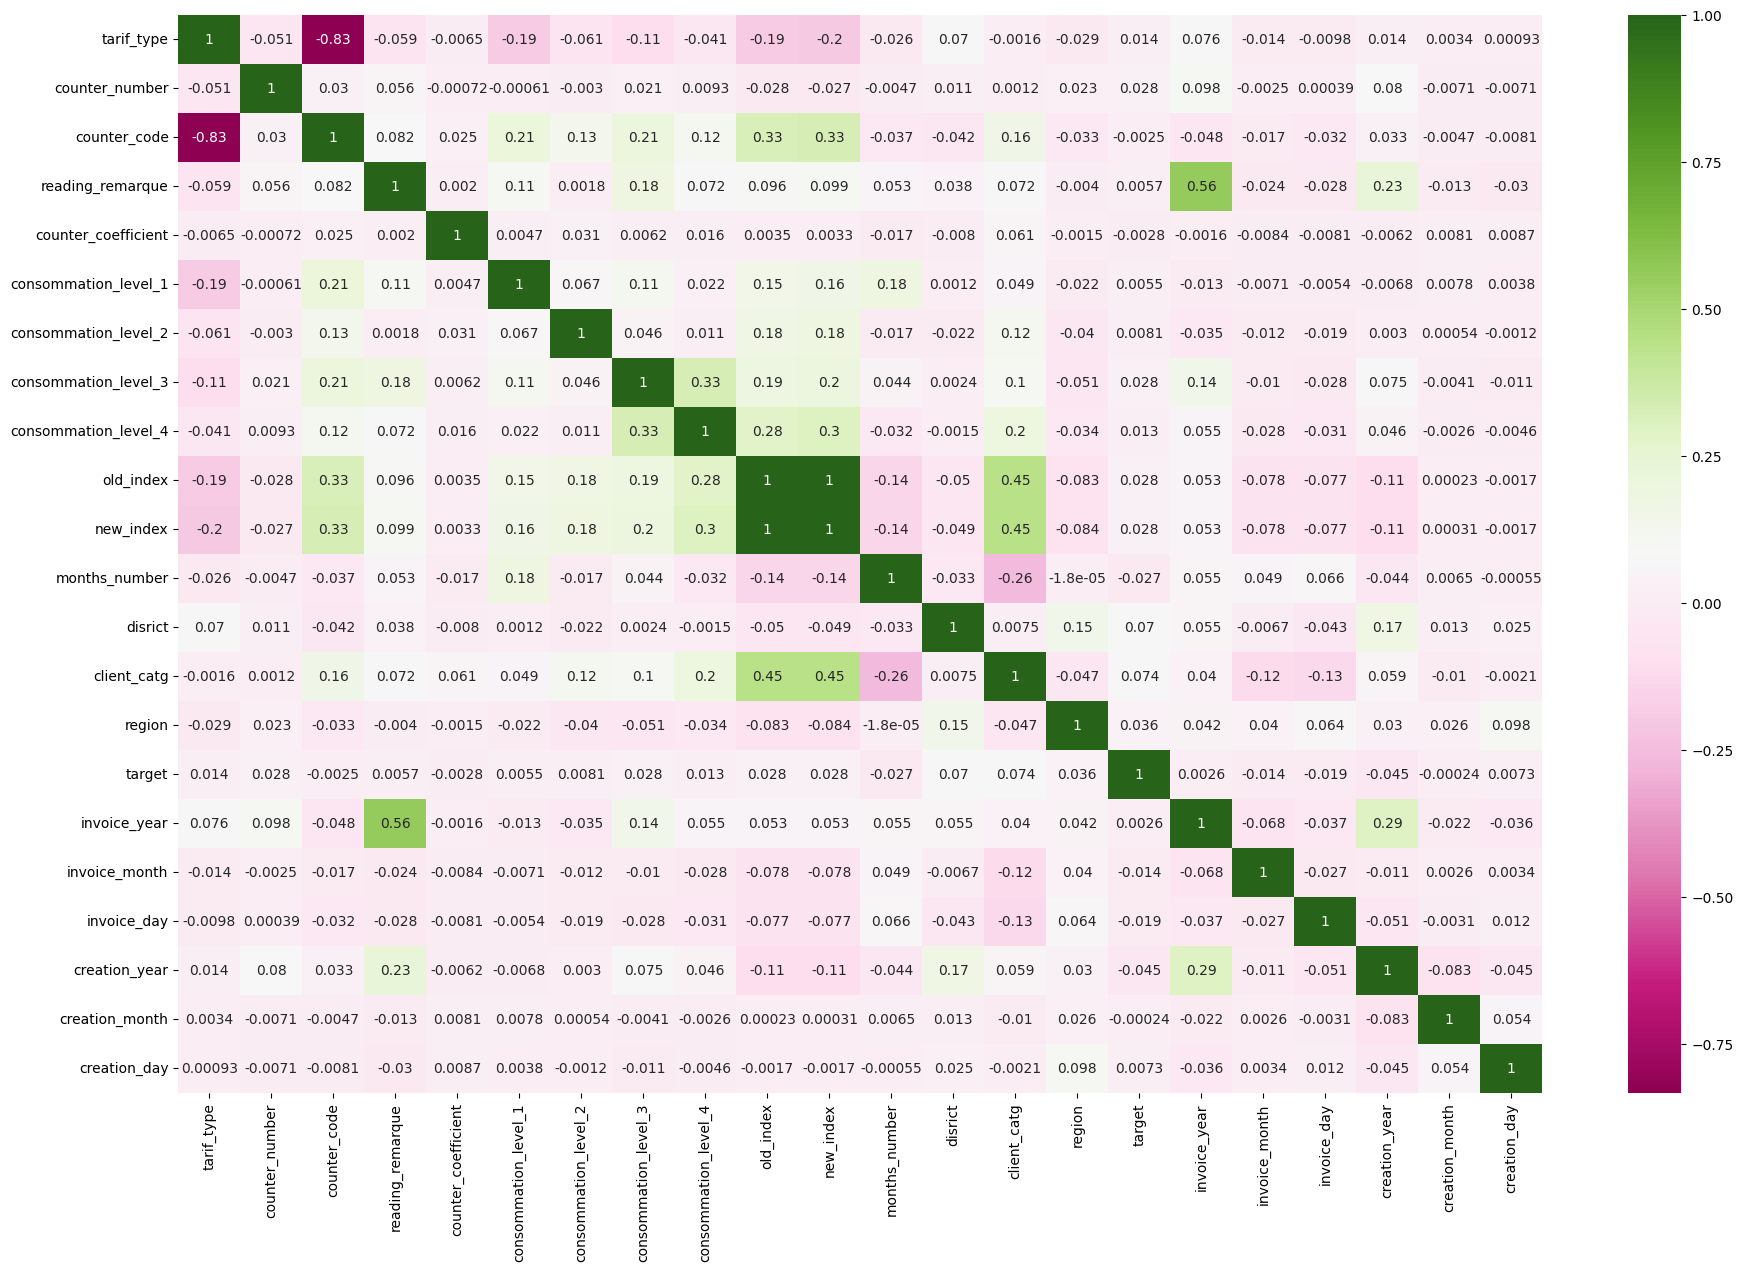

In [ ]:
correl = train.corr()
plt.figure(figsize=(22,14),dpi=100)
sns.heatmap(correl , annot = True , cmap='PiYG')

<Axes: title={'center': 'The effect of the two largest values that have an impact on the target'}, xlabel='disrict', ylabel='client_catg'>

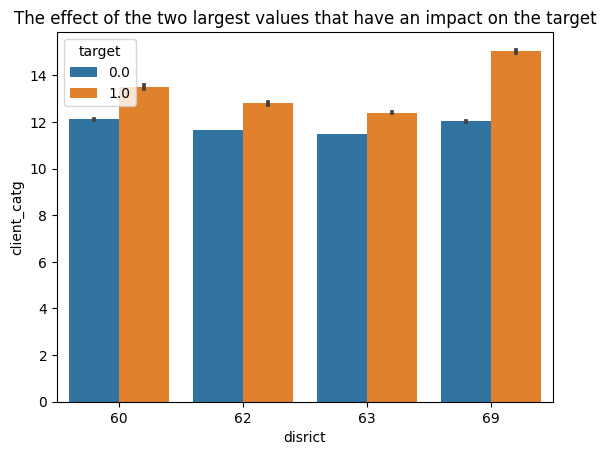

In [ ]:
plt.title ("The effect of the two largest values that have an impact on the target")
sns.barplot( data = train, x = 'disrict' , y = 'client_catg', hue ='target' )

<Axes: title={'center': 'Histogram of Petal disrict, by target'}, xlabel='disrict', ylabel='months_number'>

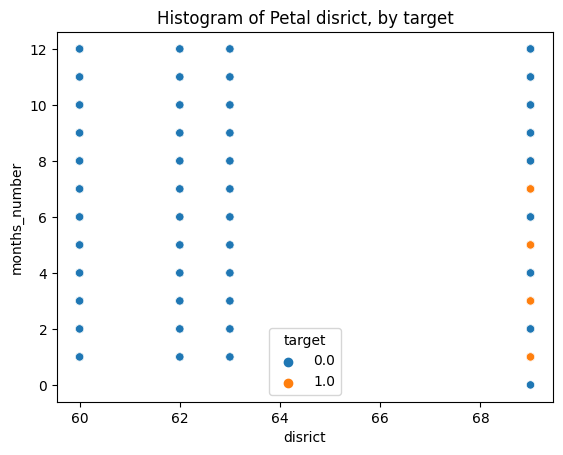

In [ ]:
plt.Figure(figsize = (15 , 10))
plt.title('Histogram of Petal disrict, by target')
sns.scatterplot(data = train, x = 'disrict' , y = 'months_number' ,hue ='target' )

<Axes: title={'center': 'Histogram of Petal client catg, by target'}, xlabel='client_catg', ylabel='Density'>

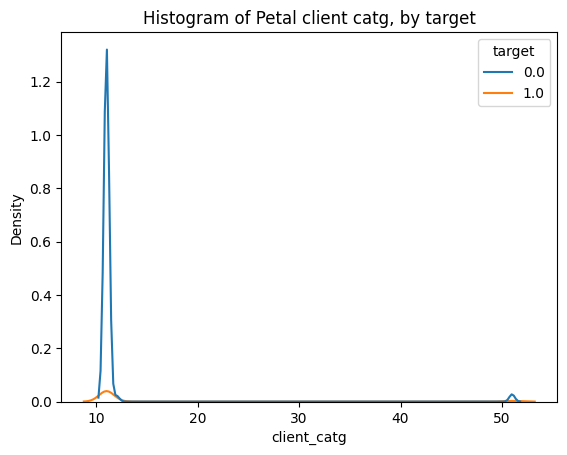

In [ ]:
plt.title('Histogram of Petal client catg, by target')
sns.kdeplot(data = train , x = 'client_catg', hue ='target')

In [38]:
train['region']= encode.fit_transform(train['region'])
# train['disrict']= encode.fit_transform(train['disrict'])
train['counter_type']= encode.fit_transform(train['counter_type'])

In [39]:
train.shape

(4439855, 24)

In [22]:
print (train.shape)
print(train['target'].value_counts())

(4439855, 24)
0.0    4089273
1.0     350582
Name: target, dtype: int64


In [40]:
y = train['target']
x = train.drop(['target'] , axis = 1)
# x = pd.get_dummies(x , drop_first=True)
x = sc.fit_transform(x)
print (y.shape)
print (x.shape)

(4439855,)
(4439855, 23)


In [41]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
x_rus, y_rus = rus.fit_resample(x, y)
print(x_rus.shape)
print(y_rus.shape)

(701164, 23)
(701164,)


In [42]:
x_train, x_test, y_train, y_test = train_test_split(x , y,test_size=0.2,shuffle=True, random_state=40)

In [20]:
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

In [26]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, max_depth=45 , criterion = 'entropy')
rfc.fit(x_train, y_train)
rfc_train = rfc.predict(x_train)
rfc_test = rfc.predict(x_test)
RF_score = rfc.score(x_test, y_test)
print("random forest train accu =", rfc.score(x_train, y_train))
print("random forest test accu =", RF_score)
print("RANDOM FOREST REPORT\n", classification_report(y_test, rfc_test))

<ipython-input-26-ac89c55fe57c>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc1.fit(x_train, y_train)


random forest train accu = 0.9994462093919734
random forest test accu = 0.9477820784687788
RANDOM FOREST REPORT
               precision    recall  f1-score   support

         0.0       0.95      1.00      0.97    818000
         1.0       0.94      0.36      0.52     69971

    accuracy                           0.95    887971
   macro avg       0.94      0.68      0.75    887971
weighted avg       0.95      0.95      0.94    887971



In [24]:
from xgboost import  XGBClassifier
fbst = XGBClassifier(n_estimators = 100, max_depth = 11, learning_rate = 0.0001, eta = 0.1)
fbst.fit(x_train , y_train)
y_xgt = fbst.predict(x_train)
y_xgb = fbst.predict(x_test)
xgb_score = fbst.score(x_test,y_test)
print ("xgBoost train accu = : " , fbst.score(x_train,y_train))
print ("xgBoost test accu = : " ,xgb_score)
print("XGBOOST REPORT\n",classification_report(y_test, y_xgb))

xgBoost train accu = :  0.9255229055903853
xgBoost test accu = :  0.9252351709684212
XGBOOST REPORT
               precision    recall  f1-score   support

         0.0       0.93      1.00      0.96    818000
         1.0       0.78      0.07      0.13     69971

    accuracy                           0.93    887971
   macro avg       0.85      0.53      0.55    887971
weighted avg       0.92      0.93      0.90    887971



In [ ]:
# from catboost import CatBoostClassifier
# clf = CatBoostClassifier( iterations=3, random_seed=40, learning_rate=0.1, custom_loss=['Accuracy'])
# clf.fit(x_train , y_train)
# y_clf = clf.predict(x_train)
# y_clf = clf.predict(x_test)
# clf_score = fbst.score(x_test,y_test)
# print ("CatBoost train accu = : " , clf.score(x_train,y_train))
# print ("CatBoost test accu = : " ,clf_score)
# print("CatBOOST REPORT\n",classification_report(y_test, y_clf))

In [31]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=4000, solver = 'liblinear' )
lr.fit(x_train, y_train)
lr_train = lr.predict(x_train)
lr_test = lr.predict(x_test)
lr_score = lr.score(x_test, y_test)
print("Logistic Regression train accu =", lr.score(x_train, y_train))
print("Logistic Regression test accu =", lr_score)
print("Logistic Regression REPORT\n", classification_report(y_test, lr_test))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic Regression train accu = 0.9209853137095694
Logistic Regression test accu = 0.9211731013738061
Logistic Regression REPORT
               precision    recall  f1-score   support

         0.0       0.92      1.00      0.96    818000
         1.0       0.25      0.00      0.00     69971

    accuracy                           0.92    887971
   macro avg       0.59      0.50      0.48    887971
weighted avg       0.87      0.92      0.88    887971



In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis(reg_param=0.0001)
qda.fit (x_train , y_train)
qda_train = qda.predict(x_train)
qda_test  = qda.predict(x_test)
qda_score = qda.score(x_test,y_test)
print ("QDA train accu : " , qda.score(x_train,y_train))
print ("QDA test accu : " ,qda_score)
print("QDA REPORT\n",classification_report(y_test, qda_test))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


QDA train accu :  0.8749058246271556
QDA test accu :  0.8756818908704328
QDA REPORT
               precision    recall  f1-score   support

         0.0       0.93      0.94      0.93    818140
         1.0       0.16      0.14      0.15     69832

    accuracy                           0.88    887972
   macro avg       0.54      0.54      0.54    887972
weighted avg       0.87      0.88      0.87    887972



In [36]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(solver='svd', tol=0.001 )
lda.fit(x_train, y_train)
lda_train = lda.predict(x_train)
lda_test = lda.predict(x_test)
lda_score = lda.score(x_test, y_test)
print("LDA train accu:", lda.score(x_train, y_train))
print("LDA test accu:", lda_score)
print("LDA REPORT\n", classification_report(y_test, lda_test))


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LDA train accu: 0.9204667156922918
LDA test accu: 0.9206133984105337
LDA REPORT
               precision    recall  f1-score   support

         0.0       0.92      1.00      0.96    818000
         1.0       0.32      0.01      0.01     69971

    accuracy                           0.92    887971
   macro avg       0.62      0.50      0.49    887971
weighted avg       0.87      0.92      0.88    887971



In [38]:
from sklearn.ensemble import BaggingClassifier
bc =  BaggingClassifier(n_estimators = 370 , max_samples = 31 , random_state =  40 , max_features=13)
bc.fit(x_train , y_train)
bc_train = bc.predict(x_train)
bc_test = bc.predict(x_test)
bagc_score = bc.score(x_test , y_test)
print ("Bagging train accu = ", bc.score(x_train , y_train))
print ("Bagging test accu = ", bagc_score)
print("BAGGING REPORT\n",classification_report(y_test, bc_test))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Bagging train accu =  0.920996575338609
Bagging test accu =  0.9212012554464053


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


BAGGING REPORT
               precision    recall  f1-score   support

         0.0       0.92      1.00      0.96    818000
         1.0       0.00      0.00      0.00     69971

    accuracy                           0.92    887971
   macro avg       0.46      0.50      0.48    887971
weighted avg       0.85      0.92      0.88    887971



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier( criterion ='entropy', splitter = 'random' ,max_depth=71, min_samples_leaf=3, random_state=80)
model.fit(x_train, y_train)
model_train = model.predict(x_train)
model_test = model.predict(x_test)
dtc_score = model.score(x_test, y_test)
print("Decision tree train accu = ",model.score(x_train, y_train))
print("Decision tree test accu = ",dtc_score)
print("DECISION TREE REPORT\n",classification_report(y_test, model_test))

Decision tree train accu =  0.9782881422929353
Decision tree test accu =  0.952163978328121
DECISION TREE REPORT
               precision    recall  f1-score   support

         0.0       0.97      0.98      0.97    818000
         1.0       0.72      0.64      0.68     69971

    accuracy                           0.95    887971
   macro avg       0.84      0.81      0.83    887971
weighted avg       0.95      0.95      0.95    887971



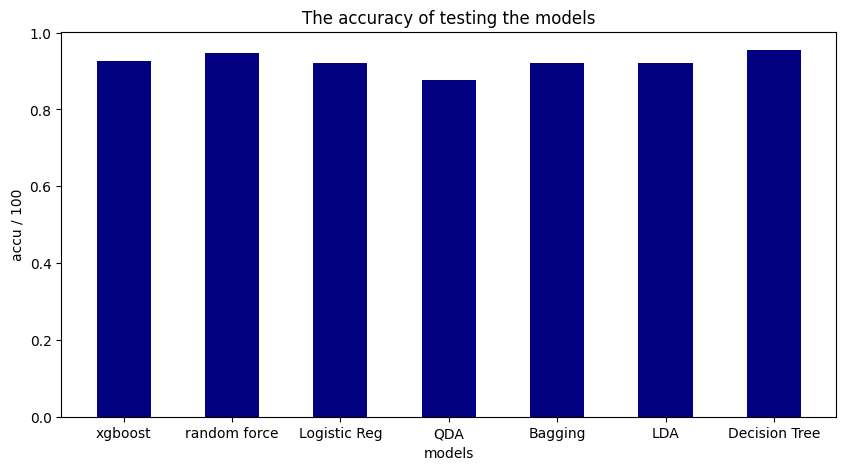

,names,value
0,xgboost,0.925235
1,random force,0.947782
2,Logistic Reg,0.921173
3,QDA,0.875682
4,Bagging,0.921201
5,LDA,0.920613
6,Decision Tree,0.954613


In [28]:
val = {'xgboost': xgb_score, 'random force': RF_score, 'Logistic reg': lr_score ,'QDA': qda_score,
       'Bagging': bagc_score, 'LDA': lda_score , 'Decision Tree' : dtc_score}

courses = list(val.keys())
values = [val[model] if val[model] is not None else 0 for model in courses]

fig = plt.figure(figsize=(10, 5))

# creating the bar plot
plt.bar(courses, values, color='navy', width=0.5)

plt.xlabel("models")
plt.ylabel("accu / 100")
plt.title("The accuracy of testing the models")
plt.show()

df = {'names': ['xgboost', 'random force', 'Logistic reg', 'QDA', 'Bagging', 'LDA' , 'Decision Tree'],
      'value': [xgb_score, RF_score, lr_score, qda_score, bagc_score, lda_score , dtc_score]}
pd.DataFrame(df)

In [ ]:
test

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type,disrict,client_catg,region,creation_date
0,test_Client_0,2018-03-16,11,651208,0,203,8,1,755,0,0,0,19145,19900,8,ELEC,62,11,307,28/05/2002
1,test_Client_0,2014-03-21,11,651208,0,203,8,1,1067,0,0,0,13725,14792,8,ELEC,62,11,307,28/05/2002
2,test_Client_0,2014-07-17,11,651208,0,203,8,1,0,0,0,0,14792,14792,4,ELEC,62,11,307,28/05/2002
3,test_Client_0,2015-07-13,11,651208,0,203,9,1,410,0,0,0,16122,16532,4,ELEC,62,11,307,28/05/2002
4,test_Client_0,2016-07-19,11,651208,0,203,9,1,412,0,0,0,17471,17883,4,ELEC,62,11,307,28/05/2002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1939725,test_Client_9999,2010-03-11,11,869269,0,203,6,1,248,0,0,0,21114,21362,4,ELEC,69,11,104,14/03/1990
1939726,test_Client_9999,2011-03-15,11,869269,0,203,6,1,260,0,0,0,21362,21622,4,ELEC,69,11,104,14/03/1990
1939727,test_Client_9999,2012-12-03,11,869269,0,203,6,1,312,0,0,0,22272,22584,4,ELEC,69,11,104,14/03/1990
1939728,test_Client_9999,2009-07-01,11,869269,0,203,6,1,236,0,0,0,19909,20145,4,ELEC,69,11,104,14/03/1990


In [ ]:
test['creation_date'].dtype

dtype('O')

In [44]:
# convert invoice date from object to int datatype
test['invoice_date'] = pd.to_datetime(test['invoice_date'], format="%Y/%m/%d")
test['invoice_year'] = test['invoice_date'].dt.year
test['invoice_month'] = test['invoice_date'].dt.month
test['invoice_day'] = test['invoice_date'].dt.day
test = test.drop('invoice_date', axis=1)

test['creation_date'] = pd.to_datetime(test['creation_date'], format="%d/%m/%Y")
test['creation_year'] = test['creation_date'].dt.year
test['creation_month'] = test['creation_date'].dt.month
test['creation_day'] = test['creation_date'].dt.day
test = test.drop('creation_date', axis=1)

In [ ]:
test['counter_statue'].value_counts()

0    1897688
1      31805
5       8968
4       1177
3         80
2         12
Name: counter_statue, dtype: int64

In [ ]:
test['tarif_type'].value_counts()

11    1159538
40     595448
10     119575
15      31538
45       8476
13       5966
14       5912
12       5795
29       5035
9        2370
8          33
21         21
27         10
42         10
30          2
24          1
Name: tarif_type, dtype: int64

In [ ]:
test['region'].unique()

array([13,  1, 16,  0,  7, 10,  9,  2, 15,  5,  8,  3, 17, 18, 12,  4, 11,
       19, 14, 20, 21, 22, 23,  6])

In [45]:
test['region']= encode.fit_transform(test['region'])
test['counter_type'] = encode.fit_transform(test['counter_type'])

In [ ]:
# test = pd.get_dummies(test , drop_first=True)
# test.shape

In [50]:
test.shape

(1939730, 24)

In [ ]:
id =  test['client_id']
test = test.drop(['client_id'], axis = 1)
predictions = model.predict(test)

In [61]:
result = pd.DataFrame({'client_id': id, 'predictions': predictions})

# Save the predictions DataFrame to a CSV file in your Google Drive
file_path = '/content/drive/My Drive/predictions.csv'
result.to_csv(file_path, index=False)

print("File saved at:", file_path)

File saved at: /content/drive/My Drive/predictions.csv


In [57]:
filtered_results = result[result['predictions'] == 1]

# Print the filtered results
print(filtered_results)

                client_id  predictions
60         test_Client_10          1.0
62         test_Client_10          1.0
65         test_Client_10          1.0
68         test_Client_10          1.0
70         test_Client_10          1.0
...                   ...          ...
1939685  test_Client_9997          1.0
1939687  test_Client_9997          1.0
1939689  test_Client_9997          1.0
1939691  test_Client_9997          1.0
1939692  test_Client_9997          1.0

[593231 rows x 2 columns]


<Axes: ylabel='Count'>

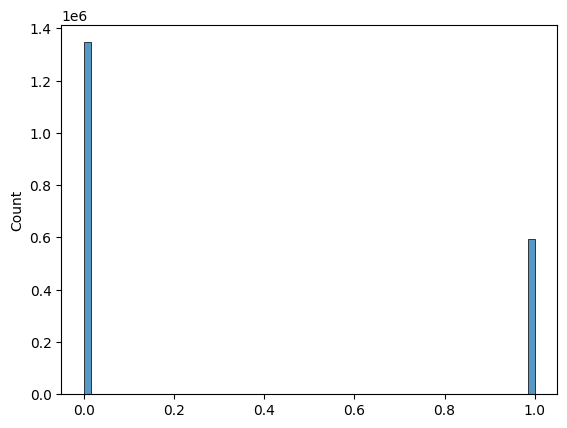

In [59]:
plt.title("test predictions")
sns.histplot(predictions)